## Solving the wave equation

In [ ]:

def sin_derivative(psi, k_cos):
    psihat = scipy.fft.dst(psi, type = 2)
    psihat = np.roll(psihat, 1)
    psihat[0] = 0
    psihat = psihat * k_cos
    psi = scipy.fft.idct(psihat, type = 2)
    return psi


def cos_derivative(psi, k_sin):
    psihat = scipy.fft.dct(psi, type = 2)
    psihat = np.roll(psihat,-1)
    psihat[-1] = 0
    psihat = - psihat * k_sin
    psi = scipy.fft.idst(psihat, type = 2)
    return psi

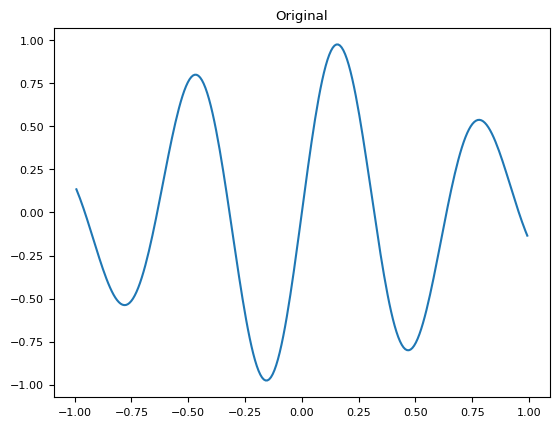

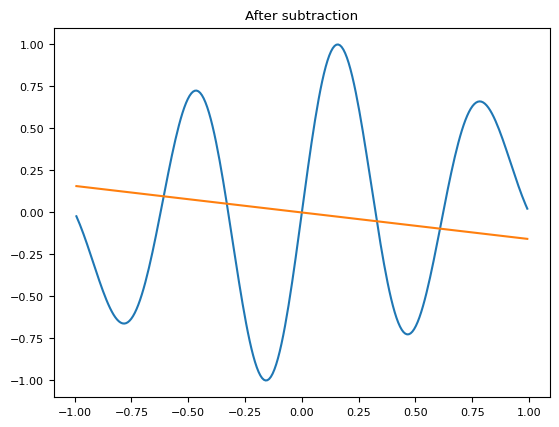

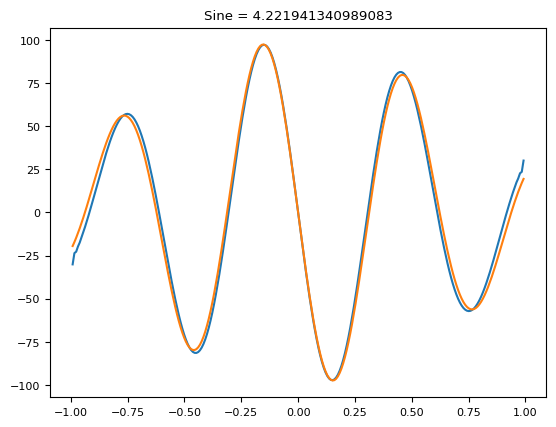

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

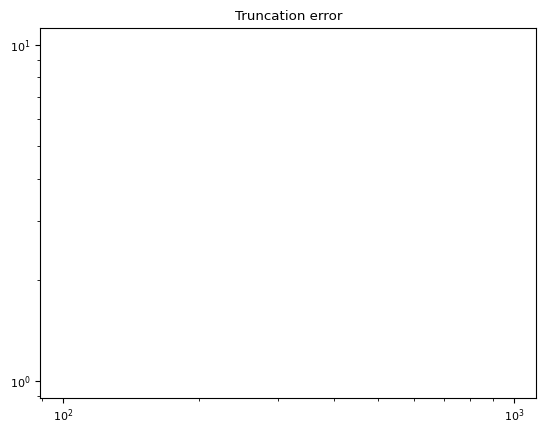

In [ ]:


resolutions = 2**np.arange(8, 9)
errors1 = []
errors2 = []
errors3 = []


#The test problem 
L0 = -1
L1 = 1
L  = L1 - L0
q = np.pi * np.pi 
alpha = 1 
def f(x):
    return np.sin(q * x) * np.exp(- alpha * x**2)
def df(x):
    return (q * np.cos(q * x) - alpha * 2*x * np.sin(q * x) ) * np.exp(-alpha * x**2)
def ddf(x):
    return (-q**2 * np.sin(q * x) - alpha * 2* np.sin(q * x) - alpha * 2 * x * q * np.cos(q * x) - 2 * alpha * x ) * np.exp(-alpha * x**2)

for resolution in resolutions:
    N = resolution 

    # Get the job done with a continuous function 
    xx    = get_x_sin_type_1(L, N) + L0 
    k_sin = get_k_sin(L, N)

    psi   = f(xx)
    psi0  = f(L0)
    psi1  = f(L1)
    dpsi0 = df(L0)
    dpsi1 = df(L1)


    plt.title(f"Original")
    plt.plot(xx, psi)
    plt.show()

    C = (psi1 - psi0)/(L1 - L0)
    B = (psi0 + C * (xx - L0))
    hompsi = (psi - B)


    plt.title(f"After subtraction")
    plt.plot(xx, hompsi, label="homogenised")
    plt.plot(xx, B, label="Linear")
    plt.show()
    
    psihat = scipy.fft.dst (hompsi, type = 1)
    psihat = - psihat * k_sin**2
    num    = scipy.fft.idst(psihat, type = 1)
    ana    = ddf(xx) 
    plt.title(f"Sine = {np.mean(np.abs(ana -num))}")
    plt.plot(xx, num)
    plt.plot(xx, ana)
    plt.show()


    errors1.append(np.mean(np.abs(ana -num)[10:-10]))

    ## Get the job done with a function with continuous first derivative 
    #xx    = get_x_sin_type_1(L, N) + L0 
    #dx    = xx[1] - xx[0]
    #k_sin = get_k_sin(L, N)
#
    #psi   = f(xx)
    #psi0  = f(L0)
    #psi1  = f(L1)
    #dpsi0 = df(L0)
    #dpsi1 = df(L1)
#
    #poly = scipy.interpolate.CubicHermiteSpline([L0, L1], [psi0, psi1], [0, dpsi1 - dpsi0], axis=0, extrapolate=None)
    #B     = poly(xx)
    #ddB   = poly(xx, 2)
    #hompsi2 = psi - B
#
    #plt.title("Hompsis")
    #plt.plot(xx        , hompsi, c = "r", label = "Linear")
    #plt.plot(xx + L    , hompsi, c = "r", )
    #plt.plot(xx + 2 * L, hompsi, c = "r", )
    #plt.plot(xx        , hompsi2, c = "k", label = "Spline")
    #plt.plot(xx + L    , hompsi2, c = "k")
    #plt.plot(xx + 2 * L, hompsi2, c = "k")
    #plt.legend()
    #plt.show()
#
    #psihat = scipy.fft.dst (hompsi2, type = 2)
    #psihat = - psihat * k_sin**2
    #num    = scipy.fft.idst(psihat, type = 2) + ddB
    #plt.title("ddB")
    #plt.plot(ddB)
    #plt.show()
    #ana    = ddf(xx) 
#
 #
    #plt.title(f"Sine 2 = {np.mean(np.abs(ana -num))}")
    #plt.plot(xx, num)
    #plt.plot(xx, ana)
    #plt.show()
    #errors2.append(np.mean(np.abs(ana -num)[10:-10]))
#
    ## Get the job done using Chebyshev
    #xx = np.cos(np.arange(0,N+1)*np.pi/N)
    #psi   = f(xx).astype(np.float128)
    #num  = chebfft(chebfft(psi))[2:-2]
    #ana  = ddf(xx)[2:-2]
    #errors3.append(np.mean(np.abs(ana -num)))
#
    ## Get the job done by making everything periodic
    #xx    = get_x_fft(L, N) + L0
    #dx    = xx[1] -xx[0]
    
plt.title(f"Truncation error")
plt.loglog(resolutions, errors1, label="Sine ( fcont)")
plt.loglog(resolutions, errors2, label="Sine (df cont)")
plt.loglog(resolutions, errors3, label="Chebyshev")
plt.loglog(resolutions, 1/2**(np.arange(len(resolutions))), label="1st order")
plt.loglog(resolutions, 1/2**(4 * np.arange(len(resolutions))), label="4th order")
plt.loglog(resolutions, 1/2**(8 * np.arange(len(resolutions))), label="8th order")
plt.legend()
    



/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


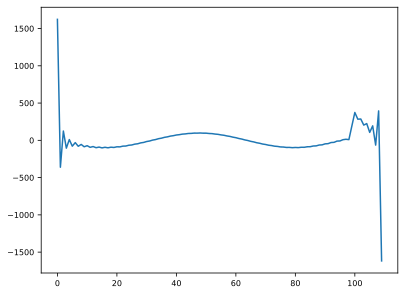

In [ ]:
N = 100
xx    = get_x_fft(1, N)
dx    = xx[1] -xx[0]
Ngh   = 10
Ltot  = 1 + Ngh * dx
Ntot  = N + Ngh
xx_larger = get_x_fft(Ltot, Ntot)
psi  = np.zeros(xx_larger.shape)
psi[:len(xx)] = f(xx)
poly = scipy.interpolate.CubicHermiteSpline([xx[-1], xx_larger[-1]], [f(xx[-1]), f(xx[0])], [df(xx[-1]), df(xx[0])], axis=0, extrapolate=None)
psi[len(xx):] = poly(xx_larger[len(xx):])

k = get_k_fft(Ltot, Ntot)
psihat = scipy.fft.fft(psi)
psihat = psihat * (-1) * k**2
ddpsi    = scipy.fft.ifft(psihat)

plt.plot(ddpsi)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real, flipud
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure,subplot,plot,grid,title,axis

figure(figsize=(10,12))
plot_count = 1

for N in [10,20,1000]:
    xx = linspace(-1.0,1.0,100)
    ff = np.sin(np.pi * np.pi * xx)
    x = cos(arange(0,N+1)*pi/N)
    f = exp(x)*sin(5*x)
    print(f[0], f[-1])
    error = np.mean(np.abs(chebfft(f) - exp(x)*(sin(5*x)+5*cos(5*x))))
    print(error)



-2.6066264306850795 0.35276852628880606
0.007491079071890364
-2.6066264306850795 0.35276852628880606
2.800846908898723e-10
-2.6066264306850795 0.35276852628880606
7.049998566742567e-13


<Figure size 1000x1200 with 0 Axes>

[1.13326243 1.04895355 1.02085058 1.0067991  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.0067991  1.02085058 1.04895355 1.13326243]


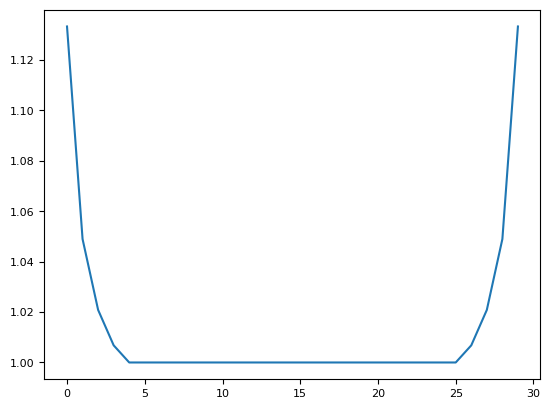

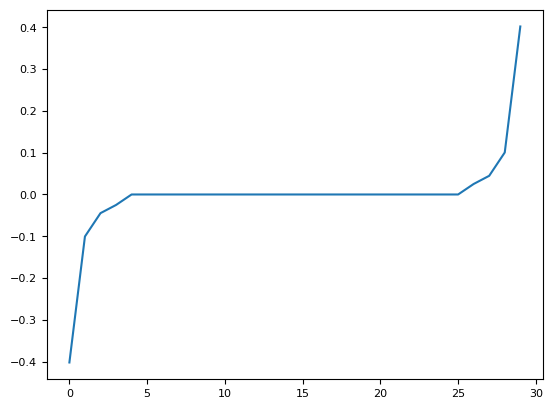

In [ ]:
x = np.linspace(-3, 10, 30 + 2)[1:-1]
y = np.real(S_func(x, -1, -3, 8, 10, 1e-1, 2, sigma5_func))
print(y)
plt.plot(np.real(S_func(x, -1, -3, 8, 10, 1e-1, 2, sigma5_func)))
plt.show()
plt.plot(np.real(dS_func(x, -1, -3, 8, 10, 1e-1, 2, dsigma5_func)))

In [ ]:


errors1 = []
errors2 = []
errors3 = []

#The test problem 
L0 = -1.5
L1 = 1.5
L  = L1- L0
q = np.pi * np.pi 

def f(x):
    return np.sin(q * x)
def df(x):
    return q * np.cos(q * x) 
def ddf(x):
    return -q**2 * np.sin(q * x) 


resolutions = 2**np.arange(5, 6)
for N in resolutions: 
    # Get the job done with a continuous function 
    xx    = get_x_fft(L, N) + L0 
    dx    = xx[1] - xx[0]
    k_fft = get_k_fft(L, N)

    plt.plot(xx, hompsi)
    plt.plot(xx + L, hompsi)
    plt.plot(xx + 2*L, hompsi)
    plt.show()
    hompsi = hompsi
    psihat = scipy.fft.fft (hompsi)
    plt.plot(psihat)
    plt.show()
    psihat = - psihat * k_fft**2
    num    = scipy.fft.ifft(psihat) + B 
    ana    = ddf(xx)

    plt.plot(num, label="rec")
    plt.plot(ana, label="ana")
    plt.legend()
    plt.show()

    N_frac = int(len(num)/4)
    errors1.append(np.mean(np.abs(num-ana)[N_frac:-N_frac]))

[-1.5     -1.40625 -1.3125  -1.21875 -1.125   -1.03125 -0.9375  -0.84375
 -0.75    -0.65625 -0.5625  -0.46875 -0.375   -0.28125 -0.1875  -0.09375
  0.       0.09375  0.1875   0.28125  0.375    0.46875  0.5625   0.65625
  0.75     0.84375  0.9375   1.03125  1.125    1.21875  1.3125   1.40625]


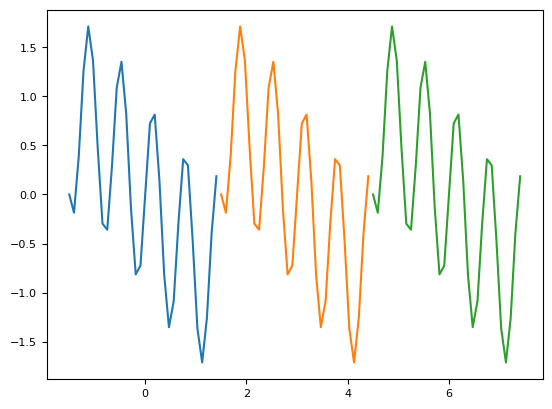

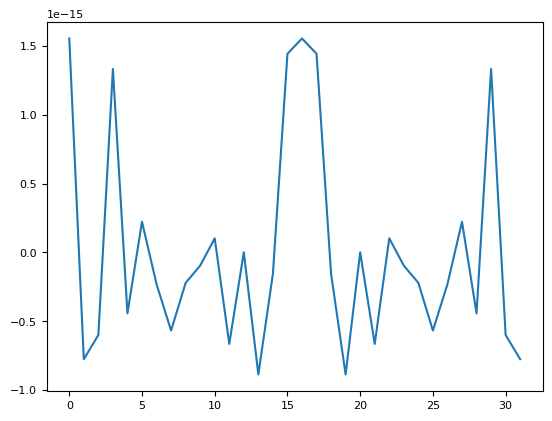

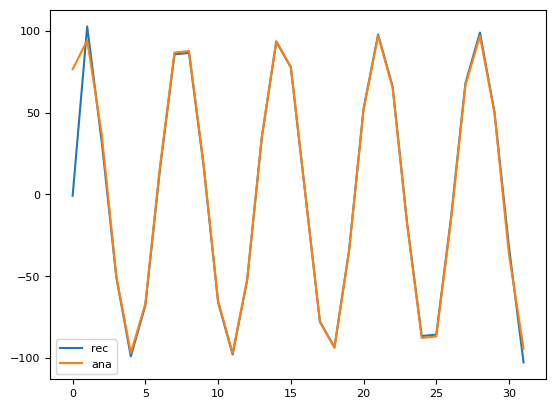

[-1.5      -1.453125 -1.40625  -1.359375 -1.3125   -1.265625 -1.21875
 -1.171875 -1.125    -1.078125 -1.03125  -0.984375 -0.9375   -0.890625
 -0.84375  -0.796875 -0.75     -0.703125 -0.65625  -0.609375 -0.5625
 -0.515625 -0.46875  -0.421875 -0.375    -0.328125 -0.28125  -0.234375
 -0.1875   -0.140625 -0.09375  -0.046875  0.        0.046875  0.09375
  0.140625  0.1875    0.234375  0.28125   0.328125  0.375     0.421875
  0.46875   0.515625  0.5625    0.609375  0.65625   0.703125  0.75
  0.796875  0.84375   0.890625  0.9375    0.984375  1.03125   1.078125
  1.125     1.171875  1.21875   1.265625  1.3125    1.359375  1.40625
  1.453125]


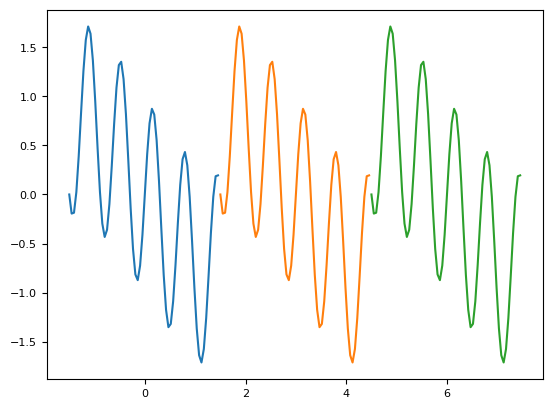

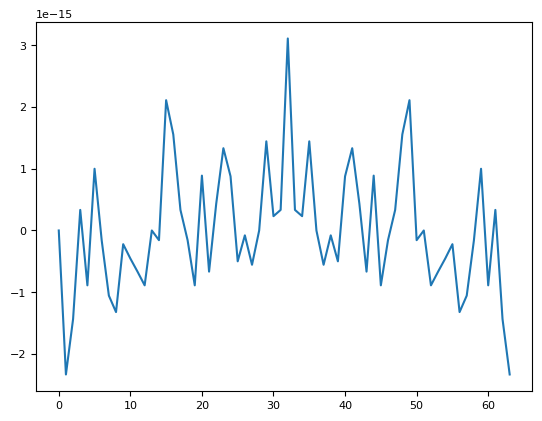

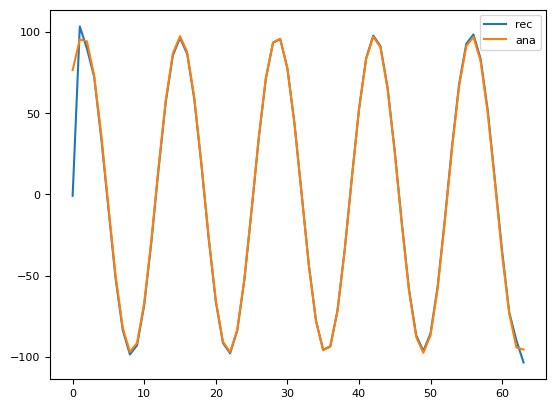

[-1.5       -1.4765625 -1.453125  -1.4296875 -1.40625   -1.3828125
 -1.359375  -1.3359375 -1.3125    -1.2890625 -1.265625  -1.2421875
 -1.21875   -1.1953125 -1.171875  -1.1484375 -1.125     -1.1015625
 -1.078125  -1.0546875 -1.03125   -1.0078125 -0.984375  -0.9609375
 -0.9375    -0.9140625 -0.890625  -0.8671875 -0.84375   -0.8203125
 -0.796875  -0.7734375 -0.75      -0.7265625 -0.703125  -0.6796875
 -0.65625   -0.6328125 -0.609375  -0.5859375 -0.5625    -0.5390625
 -0.515625  -0.4921875 -0.46875   -0.4453125 -0.421875  -0.3984375
 -0.375     -0.3515625 -0.328125  -0.3046875 -0.28125   -0.2578125
 -0.234375  -0.2109375 -0.1875    -0.1640625 -0.140625  -0.1171875
 -0.09375   -0.0703125 -0.046875  -0.0234375  0.         0.0234375
  0.046875   0.0703125  0.09375    0.1171875  0.140625   0.1640625
  0.1875     0.2109375  0.234375   0.2578125  0.28125    0.3046875
  0.328125   0.3515625  0.375      0.3984375  0.421875   0.4453125
  0.46875    0.4921875  0.515625   0.5390625  0.5625     0.585

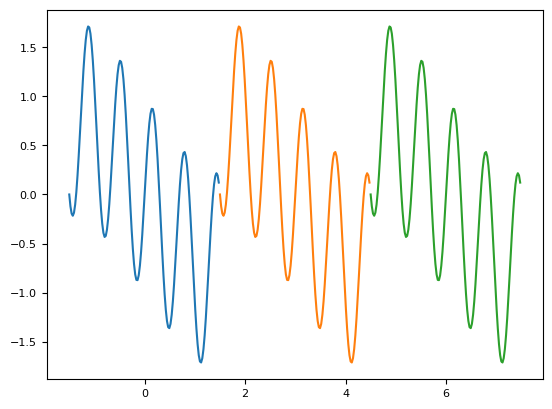

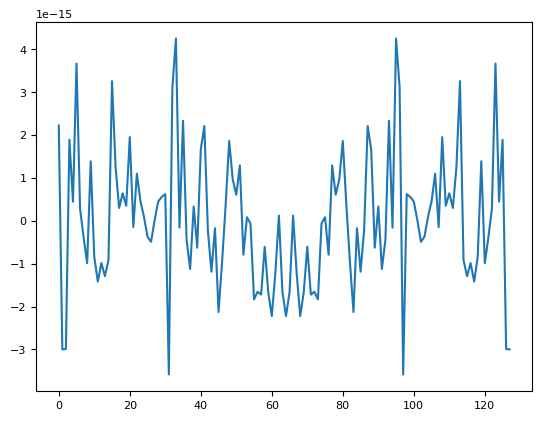

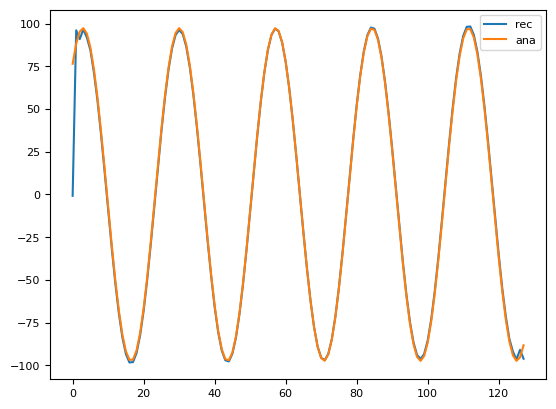

[-1.5        -1.48828125 -1.4765625  -1.46484375 -1.453125   -1.44140625
 -1.4296875  -1.41796875 -1.40625    -1.39453125 -1.3828125  -1.37109375
 -1.359375   -1.34765625 -1.3359375  -1.32421875 -1.3125     -1.30078125
 -1.2890625  -1.27734375 -1.265625   -1.25390625 -1.2421875  -1.23046875
 -1.21875    -1.20703125 -1.1953125  -1.18359375 -1.171875   -1.16015625
 -1.1484375  -1.13671875 -1.125      -1.11328125 -1.1015625  -1.08984375
 -1.078125   -1.06640625 -1.0546875  -1.04296875 -1.03125    -1.01953125
 -1.0078125  -0.99609375 -0.984375   -0.97265625 -0.9609375  -0.94921875
 -0.9375     -0.92578125 -0.9140625  -0.90234375 -0.890625   -0.87890625
 -0.8671875  -0.85546875 -0.84375    -0.83203125 -0.8203125  -0.80859375
 -0.796875   -0.78515625 -0.7734375  -0.76171875 -0.75       -0.73828125
 -0.7265625  -0.71484375 -0.703125   -0.69140625 -0.6796875  -0.66796875
 -0.65625    -0.64453125 -0.6328125  -0.62109375 -0.609375   -0.59765625
 -0.5859375  -0.57421875 -0.5625     -0.55078125 -0

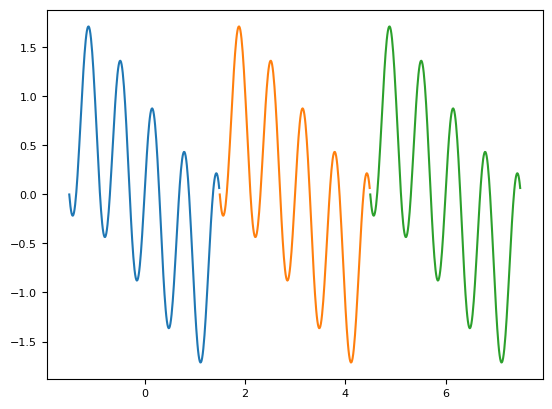

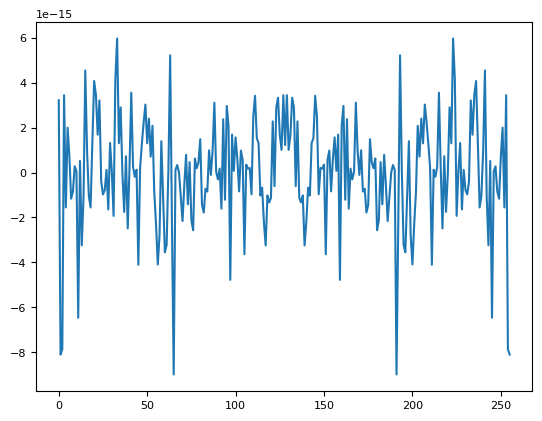

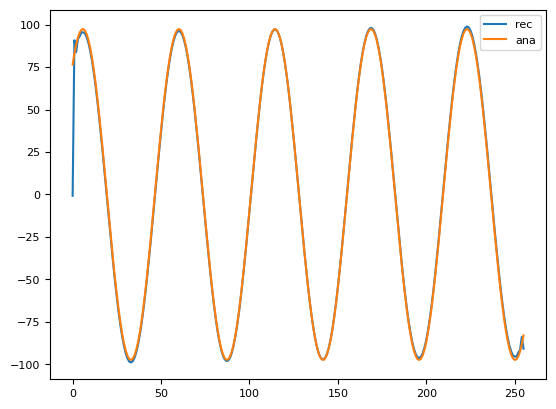

[-1.5        -1.49414062 -1.48828125 -1.48242188 -1.4765625  -1.47070312
 -1.46484375 -1.45898438 -1.453125   -1.44726562 -1.44140625 -1.43554688
 -1.4296875  -1.42382812 -1.41796875 -1.41210938 -1.40625    -1.40039062
 -1.39453125 -1.38867188 -1.3828125  -1.37695312 -1.37109375 -1.36523438
 -1.359375   -1.35351562 -1.34765625 -1.34179688 -1.3359375  -1.33007812
 -1.32421875 -1.31835938 -1.3125     -1.30664062 -1.30078125 -1.29492188
 -1.2890625  -1.28320312 -1.27734375 -1.27148438 -1.265625   -1.25976562
 -1.25390625 -1.24804688 -1.2421875  -1.23632812 -1.23046875 -1.22460938
 -1.21875    -1.21289062 -1.20703125 -1.20117188 -1.1953125  -1.18945312
 -1.18359375 -1.17773438 -1.171875   -1.16601562 -1.16015625 -1.15429688
 -1.1484375  -1.14257812 -1.13671875 -1.13085938 -1.125      -1.11914062
 -1.11328125 -1.10742188 -1.1015625  -1.09570312 -1.08984375 -1.08398438
 -1.078125   -1.07226562 -1.06640625 -1.06054688 -1.0546875  -1.04882812
 -1.04296875 -1.03710938 -1.03125    -1.02539062 -1

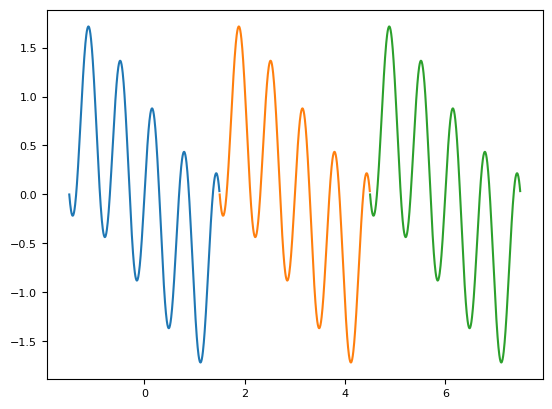

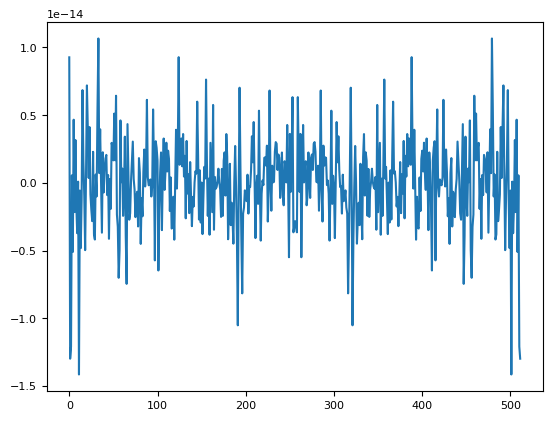

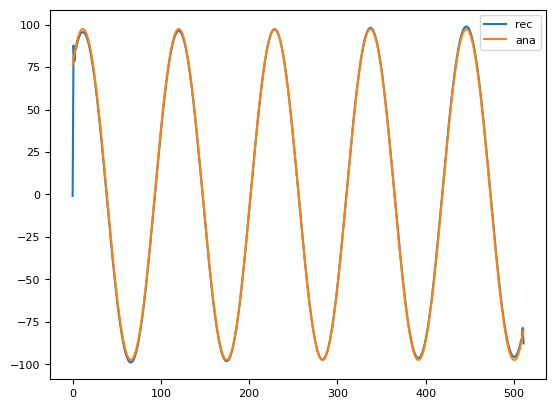

[-1.5        -1.49707031 -1.49414062 ...  1.49121094  1.49414062
  1.49707031]


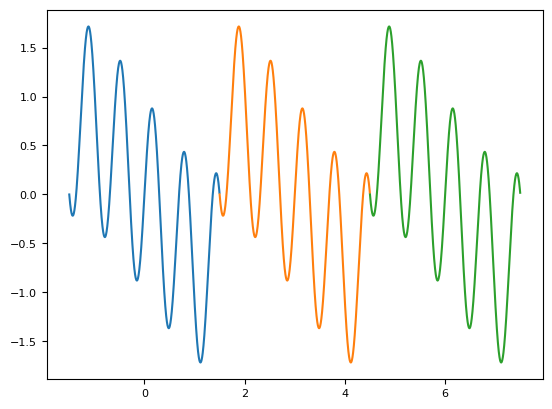

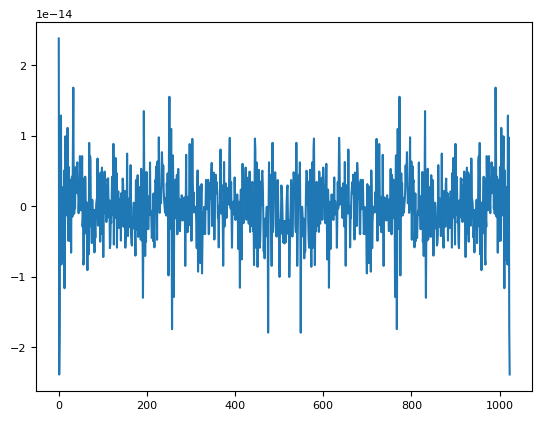

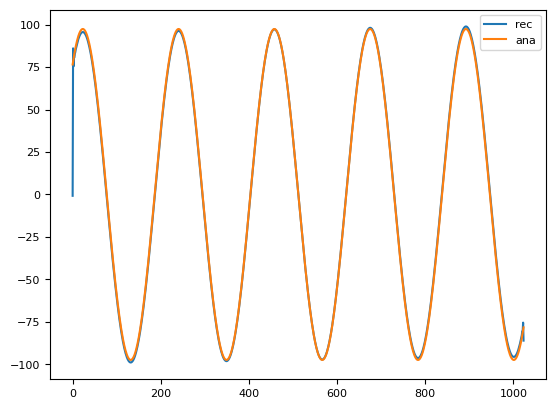

[-1.5        -1.49853516 -1.49707031 ...  1.49560547  1.49707031
  1.49853516]


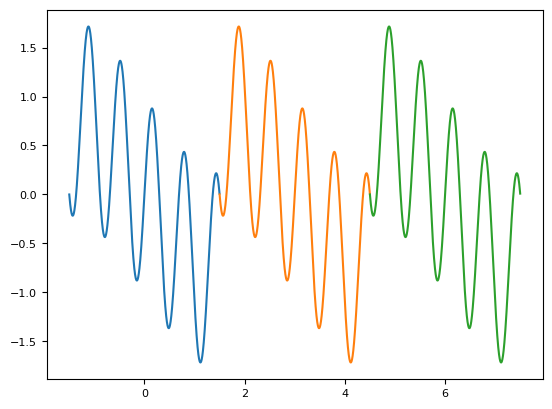

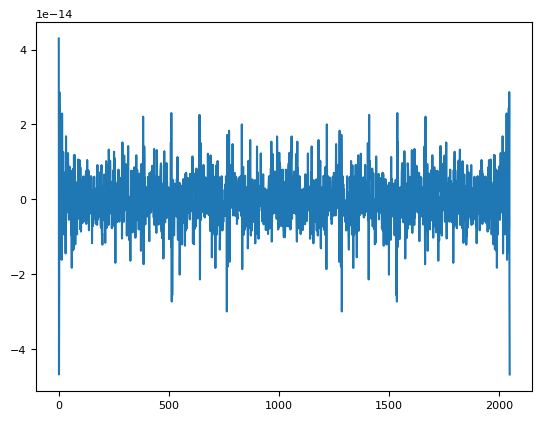

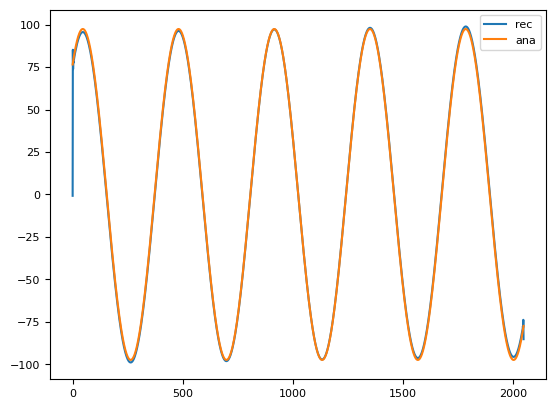

In [ ]:


errors1 = []
errors2 = []
errors3 = []

#The test problem 
L0 = -1.5
L1 = 1.5
L  = L1- L0
q = np.pi * np.pi 

def f(x):
    return np.sin(q * x)
def df(x):
    return q * np.cos(q * x) 
def ddf(x):
    return -q**2 * np.sin(q * x) 


resolutions = 2**np.arange(5, 12)
for N in resolutions: 
    # Get the job done with a continuous function 
    xx   = get_x_fft(L, N) + L0 
    print(xx)
    k_fft = get_k_fft(L, N)
    dx   = xx[1] - xx[0]
    psi   = f(xx)
    psi0  = f(L0)
    psi1  = f(L1)
    dpsi0 = df(L0)
    dpsi1 = df(L1)

    poly = scipy.interpolate.CubicHermiteSpline([L0, L1], [psi0, psi1], [0, dpsi1 - dpsi0], axis=0, extrapolate=None)
    B     = poly(xx)
    ddB   = poly(xx, 2)
    hompsi = psi - B
    plt.plot(xx, hompsi)
    plt.plot(xx + L, hompsi)
    plt.plot(xx + 2*L, hompsi)
    plt.show()
    hompsi = hompsi
    psihat = scipy.fft.fft (hompsi)
    plt.plot(psihat)
    plt.show()
    psihat = - psihat * k_fft**2
    num    = scipy.fft.ifft(psihat) + B 
    ana    = ddf(xx)

    plt.plot(num, label="rec")
    plt.plot(ana, label="ana")
    plt.legend()
    plt.show()

    N_frac = int(len(num)/4)
    errors1.append(np.mean(np.abs(num-ana)[N_frac:-N_frac]))

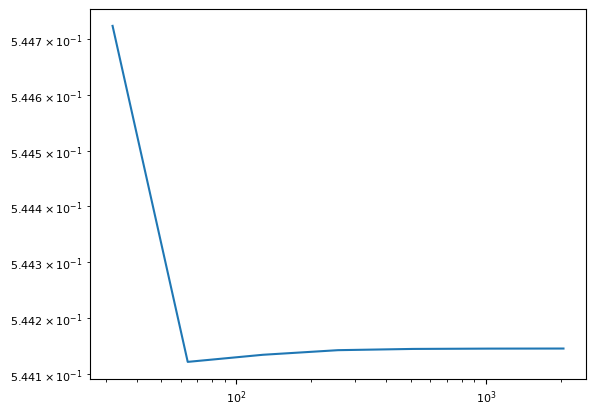

In [ ]:
plt.loglog(resolutions, errors1)

In [ ]:


N = 16
L = 1
q = 1.5  * np.pi 
xx   = get_x(L, N)
k_cos = get_k_cos(L, N)
k_sin = get_k_sin(L, N)
psi   = np.sin(q * xx)
psi1  = np.sin(q * L)
psi0  = np.sin(q * 0)
Ll    = 0
Lh    = L 

C = (psi1 - psi0)/(Lh - Ll)
B = (psi0 + C * (xx - Ll))
hompsi = (psi - B)

dpsi  = sin_derivative(hompsi, k_cos)

plt.title("First derivative")
plt.plot(dpsi + C, label = "num dpsi")
plt.plot(q * np.cos(q * xx), label = "ana dpsi")
plt.legend()
plt.show()

#ddpsi = cos_derivative(dpsi, k_sin)

psihat    = scipy.fft.dct(dpsi, type = 2)
psihatana = scipy.fft.dct(q * np.cos(q * xx), type = 2)


plt.title("First derivative in frequency space")
plt.plot(psihat, label = "num dpsi")
plt.plot(psihatana, label = "ana dpsi")
plt.legend()
plt.show()

psihat = np.roll(psihat,-1)
psihat[-1] = 0
psihat = psihat * k_sin


psihatana = np.roll(psihatana,-1)
psihatana[-1] = 0
psihatana = psihatana * k_sin

plt.title("Second derivative in frequency space")
plt.plot(psihat, label = "num dpsi")
plt.plot(psihatana , label = "ana dpsi")
plt.legend()
plt.show()


ddpsi = scipy.fft.idst(-psihat, type = 2)


plt.title("Second derivative")
plt.plot(ddpsi, label = "num ddpsi")
plt.plot(- q**2 * np.sin(q * xx), label = "ana ddpsi")
plt.legend()
plt.show()

np.abs(- q**2 * np.sin(q * xx) - ddpsi)



NameError: name 'get_x' is not defined

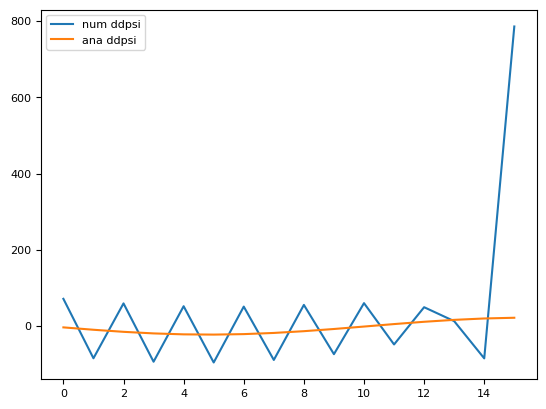

array([ 74.8324983 ,  74.73575028,  74.53463899,  74.21263104,
        73.7412742 ,  73.07451877,  72.13827691,  70.81076863,
        68.8836395 ,  65.97951233,  61.36061738,  53.42887157,
        38.19348266,   3.36009927, 104.58182877, 763.47995464])

In [ ]:


N = 16
L = 1
q = 1.5  * np.pi 
xx   = get_x(L, N) 
k_cos = get_k_cos(L, N)
k_sin = get_k_sin(L, N)
psi   = np.sin(q * xx)
dpsi  = sin_derivative(psi, k_cos)
ddpsi = cos_derivative(dpsi, k_sin)



plt.plot(ddpsi, label = "num ddpsi")
plt.plot(- q**2 * np.sin(q * xx), label = "ana ddpsi")
plt.legend()
plt.show()

np.abs(- q**2 * np.sin(q * xx) - ddpsi)

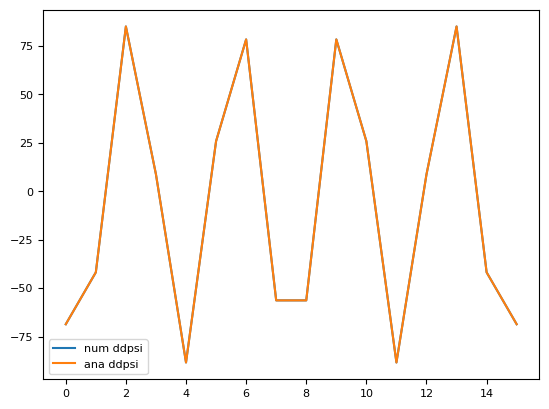

array([2.84217094e-14, 7.10542736e-15, 2.84217094e-14, 2.13162821e-14,
       5.68434189e-14, 2.48689958e-14, 8.52651283e-14, 1.42108547e-14,
       5.68434189e-14, 4.26325641e-14, 2.84217094e-14, 7.10542736e-14,
       3.55271368e-15, 4.26325641e-14, 4.26325641e-14, 2.13162821e-13])

In [ ]:


N = 16
L = 3
q = 3  * np.pi 
xx   = get_x(L, N) 
k_cos = get_k_cos(L, N)
k_sin = get_k_sin(L, N)
psi   = np.sin(q * xx)
dpsi  = sin_derivative(psi, k_cos)
ddpsi = cos_derivative(dpsi, k_sin)



plt.plot(ddpsi, label = "num ddpsi")
plt.plot(- q**2 * np.sin(q * xx), label = "ana ddpsi")
plt.legend()
plt.show()

np.abs(- q**2 * np.sin(q * xx) - ddpsi)

[0.0625 0.1875 0.3125 0.4375 0.5625 0.6875 0.8125 0.9375 1.0625 1.1875
 1.3125 1.4375 1.5625 1.6875 1.8125 1.9375]


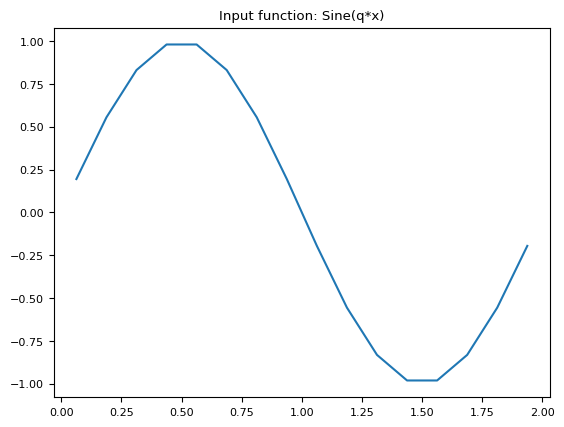

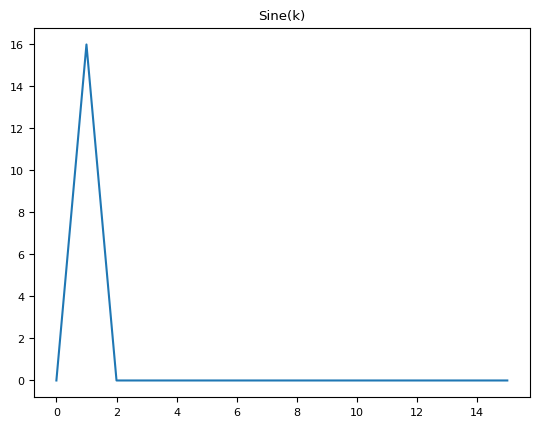

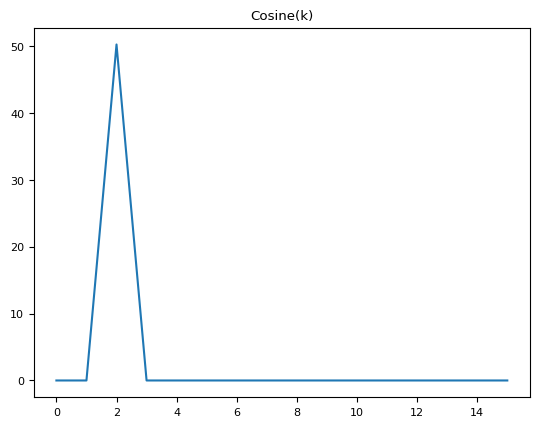

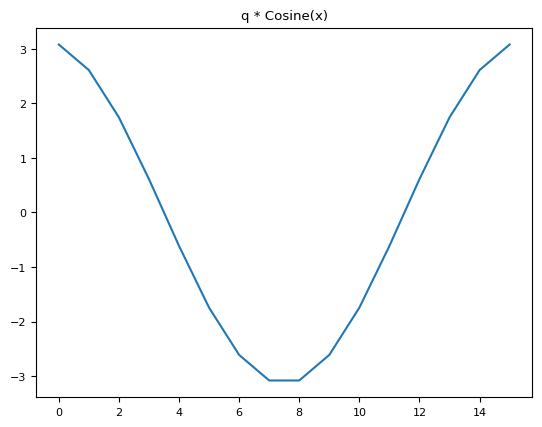

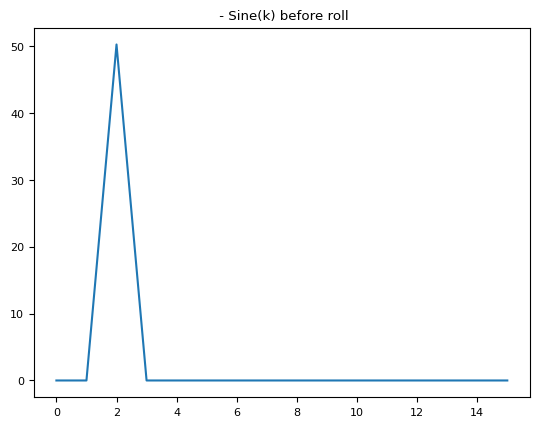

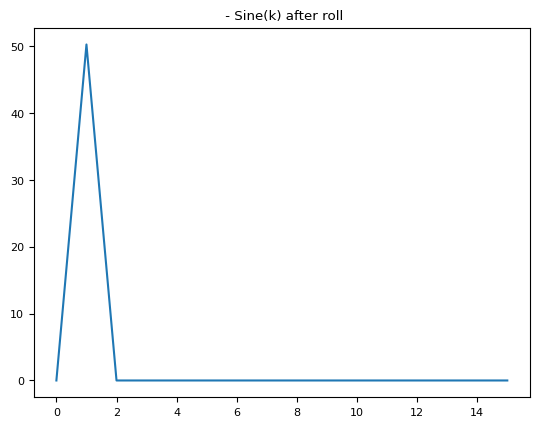

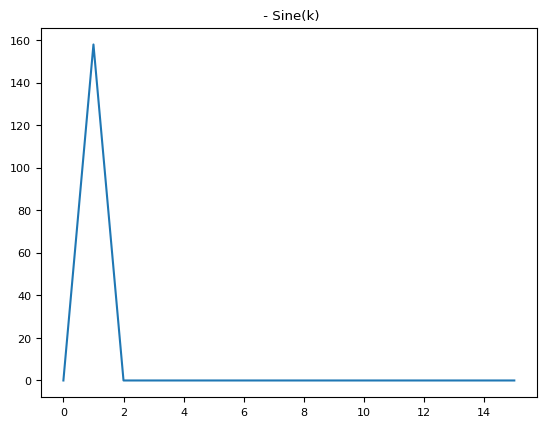

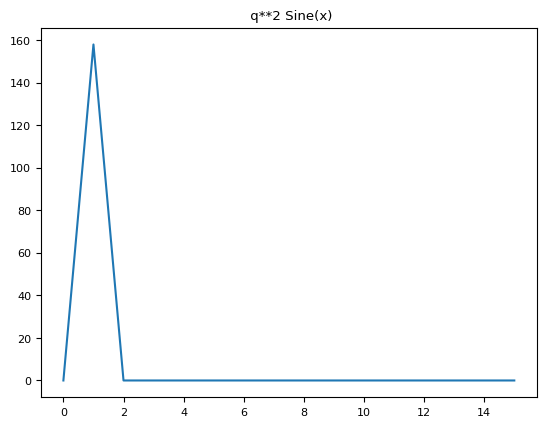

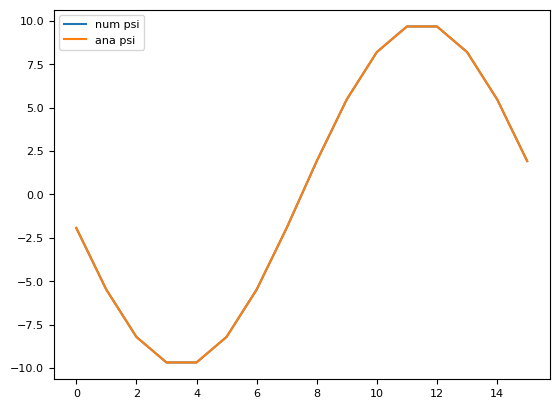

array([5.55111512e-14, 4.17443857e-14, 1.42108547e-14, 5.32907052e-15,
       1.24344979e-14, 1.77635684e-14, 2.66453526e-14, 3.37507799e-14,
       3.26405569e-14, 1.33226763e-14, 3.55271368e-15, 0.00000000e+00,
       1.59872116e-14, 3.55271368e-14, 7.10542736e-14, 1.22790667e-13])

In [ ]:

N = 16

L = 2
dx = L/N
x = np.linspace(0+dx/2, L-dx/2, N)
print(x)
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
k_sin = np.pi / (L) * np.arange(1, N+1)
k_cos = np.pi / (L) * np.arange(0, N  )

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 1 * np.pi 

hompsi  = np.sin(q * x)
plt.title("Input function: Sine(q*x)")
plt.plot(x, hompsi)
plt.show()

psihat = scipy.fft.dst(hompsi, type = 2)
plt.title("Sine(k)")
plt.plot(psihat)
plt.show()
psihat = np.roll(psihat, 1)
psihat[0] = 0
psihat = psihat * k_cos
plt.title("Cosine(k)")
plt.plot(psihat)
plt.show()
hompsi = scipy.fft.idct(psihat, type = 2)

plt.title("q * Cosine(x)")
plt.plot(hompsi)
plt.show()
psihat = scipy.fft.dct(hompsi, type = 2)

plt.title(" - Sine(k) before roll")
plt.plot(psihat)
plt.show()

psihat = np.roll(psihat,-1)

plt.title(" - Sine(k) after roll")
plt.plot(psihat)
plt.show()
psihat[-1] = 0
psihat = psihat * k_sin

plt.title(" - Sine(k)")
plt.plot(psihat)
plt.show()

hompsi = scipy.fft.idst(-psihat, type = 2)


plt.title(" q**2 Sine(x)")
plt.plot(psihat)
plt.show()
plt.plot(hompsi, label = "num psi")
plt.plot(- q**2 * np.sin(q * x), label = "ana psi")
plt.legend()
plt.show()

np.abs(- q**2 * np.sin(q * x) - hompsi)


In [ ]:


def get_x(L, N):
    dx = L/N
    xx = np.linspace(0+dx/2, L-dx/2, N)
    return xx

def get_k_sin(L, N):
    k_sin = np.pi / (L) * np.arange(1, N+1)
    return k_sin

def get_k_cos(L, N):
    k_cos = np.pi / (L) * np.arange(0, N  )
    return k_cos

def sin_derivative(psi, k_cos):
    psihat = scipy.fft.dst(psi, type = 2)
    psihat = np.roll(psihat, 1)
    psihat[0] = 0
    psihat = psihat * k_cos
    psi = scipy.fft.idct(psihat, type = 2)
    return psi


def cos_derivative(psi, k_sin):
    psihat = scipy.fft.dct(psi, type = 2)
    psihat = np.roll(psihat,-1)
    psihat[-1] = 0
    psihat = psihat * k_sin
    psi = scipy.fft.idst(-psihat, type = 2)
    return psi 



[0.0625 0.1875 0.3125 0.4375 0.5625 0.6875 0.8125 0.9375 1.0625 1.1875
 1.3125 1.4375 1.5625 1.6875 1.8125 1.9375]
[ 0.38268343  0.92387953  0.92387953  0.38268343 -0.38268343 -0.92387953
 -0.92387953 -0.38268343  0.38268343  0.92387953  0.92387953  0.38268343
 -0.38268343 -0.92387953 -0.92387953 -0.38268343]


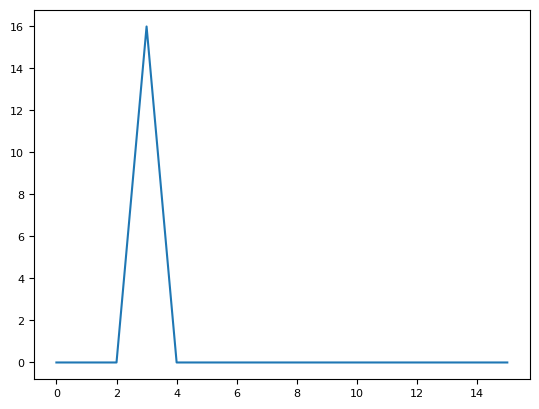

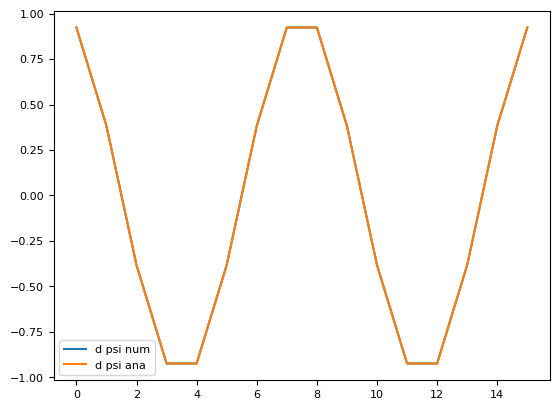

array([1.11022302e-16, 4.44089210e-16, 3.33066907e-16, 3.33066907e-16,
       1.11022302e-16, 1.49880108e-15, 1.88737914e-15, 3.33066907e-16,
       6.66133815e-16, 2.05391260e-15, 1.94289029e-15, 5.55111512e-16,
       5.55111512e-16, 2.22044605e-15, 2.44249065e-15, 1.33226763e-15])

In [ ]:

N = 16

L = 2
dx = L/N
x = np.linspace(0+dx/2, L-dx/2, N)
print(x)
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
klin = np.pi / (L) * np.arange(0, N)

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 2 * np.pi 

psi  = np.sin(q * x)
dpsi = np.cos(q * x)
print(psi)
psihat = scipy.fft.dst(psi, type = 2)
plt.plot(psihat)
plt.show()
psihat = np.roll(psihat, 1)
psihat[0] = 0
psihat = psihat * klin
#plt.plot(psihat)
hompsi = scipy.fft.idct(psihat, type = 2)
plt.plot(hompsi / q, label = "d psi num")
plt.plot(dpsi, label = "d psi ana")
plt.legend()
plt.show()
np.abs(hompsi/ q- dpsi)

[0.03125 0.09375 0.15625 0.21875 0.28125 0.34375 0.40625 0.46875 0.53125
 0.59375 0.65625 0.71875 0.78125 0.84375 0.90625 0.96875]
[ 0.99518473  0.95694034  0.88192126  0.77301045  0.63439328  0.47139674
  0.29028468  0.09801714 -0.09801714 -0.29028468 -0.47139674 -0.63439328
 -0.77301045 -0.88192126 -0.95694034 -0.99518473]


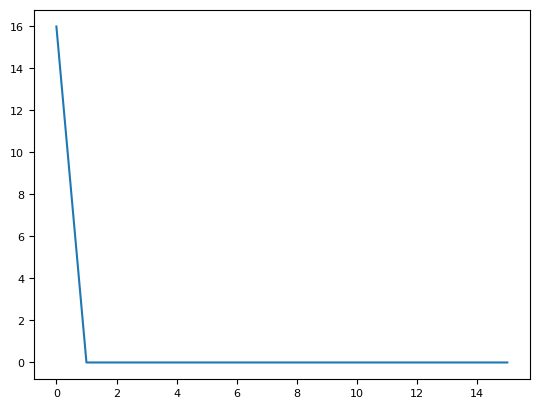

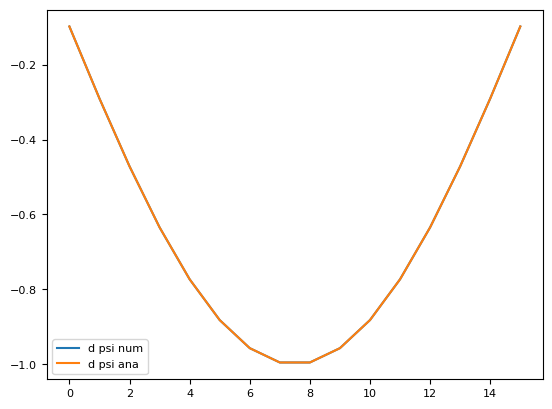

array([1.79023463e-15, 1.11022302e-15, 1.27675648e-15, 9.99200722e-16,
       2.22044605e-16, 6.66133815e-16, 1.11022302e-16, 4.44089210e-16,
       5.55111512e-16, 1.77635684e-15, 2.44249065e-15, 1.77635684e-15,
       3.10862447e-15, 3.77475828e-15, 3.83026943e-15, 4.91273688e-15])

In [ ]:

N = 16

L = 1
dx = L/N
x = np.linspace(0+dx/2, L-dx/2, N)
print(x)
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
klin = np.pi / (L) * np.arange(1, N+1)

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 1 * np.pi 

psi  = np.cos(q * x)
dpsi = -np.sin(q * x)
print(psi)
psihat = scipy.fft.dct(psi, type = 2)
psihat = np.roll(psihat,-1)
plt.plot(psihat)
plt.show()
#psihat[-1] = 0
psihat = psihat * klin
#plt.plot(psihat)
hompsi = scipy.fft.idst(-psihat, type = 2)
plt.plot(hompsi / q, label = "d psi num")
plt.plot(dpsi, label = "d psi ana")
plt.legend()
plt.show()
np.abs(hompsi/ q- dpsi)


[ 6.59194921e-16  1.38273134e-14 -1.39784805e-14 -4.89750305e-15
 -4.28867607e-15  4.88791260e-15  1.23578199e-14 -1.61730508e-14
  1.59608865e-14  3.10590089e-15 -2.08653923e-14  1.41168409e-14
 -8.95998352e-15  6.97216184e-16 -6.21878628e-15  3.19744231e-14
  3.10000000e+01 -2.82571081e-14  2.31240066e-14 -7.56846176e-15
  1.95506723e-14 -1.83948694e-14  6.94161748e-15  1.00460879e-14
 -1.84103964e-14  7.54292785e-15 -7.38591441e-15  2.90089729e-15
 -4.53939266e-15  9.14901039e-15  2.05063336e-14 -4.75383621e-14]


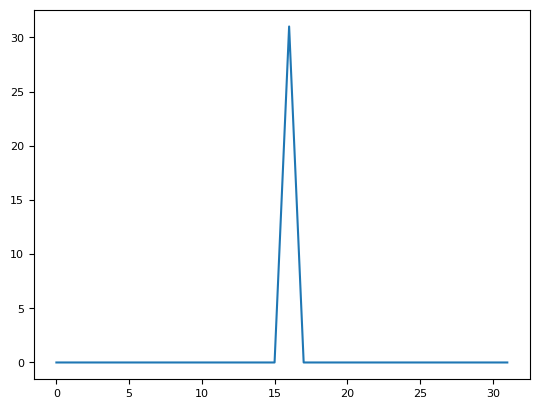

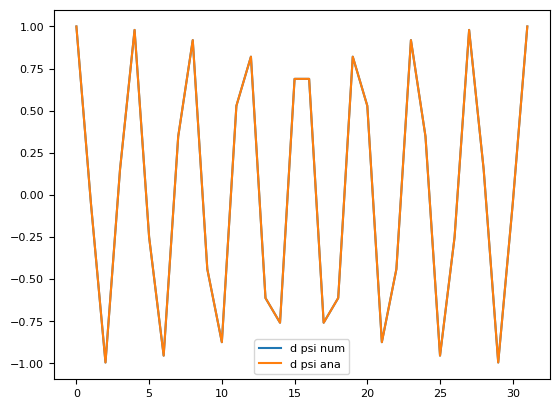

array([0.00000000e+00, 2.42861287e-16, 0.00000000e+00, 5.55111512e-17,
       3.33066907e-16, 0.00000000e+00, 5.55111512e-16, 3.33066907e-16,
       1.66533454e-15, 3.88578059e-16, 2.10942375e-15, 1.22124533e-15,
       2.99760217e-15, 1.66533454e-15, 2.55351296e-15, 1.44328993e-15,
       2.99760217e-15, 3.66373598e-15, 2.99760217e-15, 4.99600361e-15,
       2.88657986e-15, 1.88737914e-15, 3.21964677e-15, 1.55431223e-15,
       3.71924713e-15, 7.10542736e-15, 3.71924713e-15, 6.10622664e-15,
       2.05391260e-15, 1.66533454e-15, 1.31838984e-15, 3.33066907e-15])

In [ ]:

N = 32

L = 4
x = np.linspace(0, L, N) 
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
klin = np.pi / L * np.arange(0, N)

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 4 * np.pi 

psi  = np.cos(q * x)
dpsi = np.cos(q * x)
psihat = scipy.fft.dct(psi, type = 1)
print(psihat)
plt.plot(psihat)
plt.show()
psihat = psihat * klin**2 
hom = scipy.fft.idct(psihat, type = 1)
plt.plot(hom / q**2, label = "d psi num")
plt.plot(dpsi, label = "d psi ana")
plt.legend()
plt.show()
np.abs(dpsi - hom / q**2)

[ 2.48689958e-14 -2.00211606e-14  8.17646730e-15  5.71840377e-15
 -8.55931823e-15  3.94107786e-15 -2.96725893e-15  5.52270620e-16
 -4.30195295e-15  4.54703299e-15 -4.13662678e-15  7.33467590e-15
 -5.15942375e-15  1.24324088e-14 -3.09199956e-15  1.10540864e-14
  3.20000000e+01 -3.44011792e-14  2.03287825e-14  3.47272152e-16
 -1.20825571e-15  6.84527420e-16  6.46782616e-15 -7.60491580e-15
  1.10214492e-15  2.69796529e-15 -2.61977867e-15 -2.90468632e-15
  4.72360912e-15 -1.85689819e-15 -2.38016946e-15  3.64106497e-15]


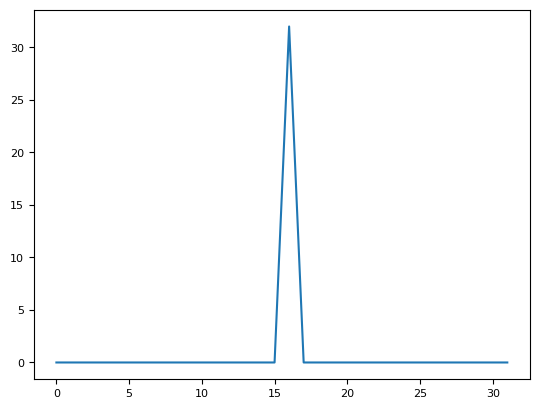

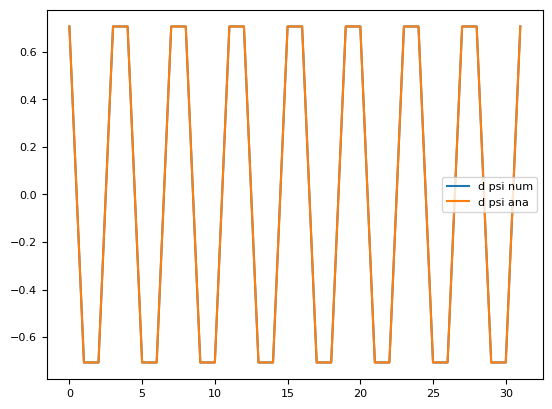

array([2.22044605e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
       4.44089210e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       1.11022302e-16, 2.22044605e-16, 1.11022302e-16, 1.11022302e-16,
       0.00000000e+00, 1.11022302e-16, 1.11022302e-16, 0.00000000e+00,
       1.11022302e-16, 1.11022302e-16, 6.66133815e-16, 2.22044605e-15,
       6.66133815e-16, 1.55431223e-15, 8.88178420e-16, 1.44328993e-15,
       1.33226763e-15, 1.11022302e-15, 1.11022302e-15, 1.44328993e-15,
       1.55431223e-15, 1.11022302e-15, 1.44328993e-15, 2.22044605e-16])

In [ ]:

N = 32

L = 4

dx = L/N 
x = np.linspace(0+dx/2, L-dx/2, N) 
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
klin = np.pi / L * np.arange(0, N)

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 4 * np.pi 

psi  = np.cos(q * x)
dpsi = np.cos(q * x)
psihat = scipy.fft.dct(psi, type = 2)
print(psihat)
plt.plot(psihat)
plt.show()
psihat = psihat * klin**2 
hom = scipy.fft.idct(psihat, type = 2)
plt.plot(hompsi / q**2, label = "d psi num")
plt.plot(dpsi, label = "d psi ana")
plt.legend()
plt.show()
np.abs(dpsi - hompsi / q**2)

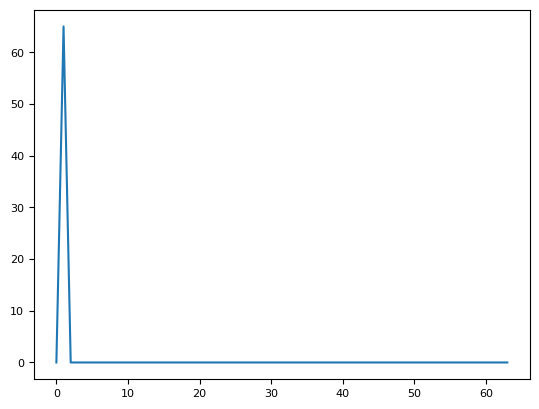

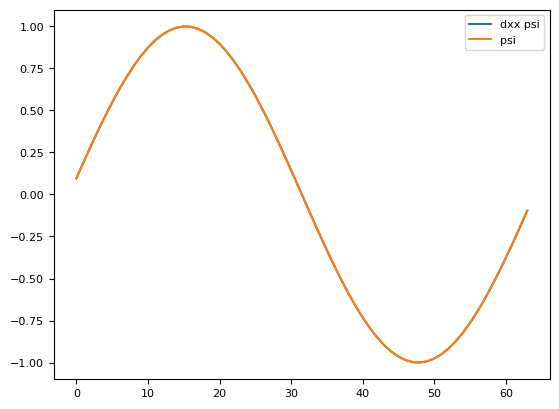

0.015384615384615385


In [ ]:

N = 64

L = 1
x = np.linspace(0, L, N + 2)[1:-1] 
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
klin = np.pi / L * np.arange(1, N+1)

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 2 * np.pi 

psi = np.sin(q * x)
psihat = scipy.fft.dst(psi, type = 1)
plt.plot(psihat)
plt.show()
psihat = psihat * klin**2
hompsi = scipy.fft.idst(psihat, type = 1)
plt.plot(hompsi / q**2, label = "dxx psi")
plt.plot(psi, label = "psi")
plt.legend()
plt.show()
np.abs(psi - hompsi / q**2)
print(dx)

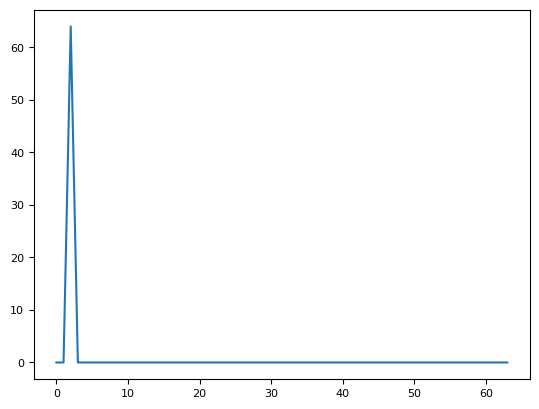

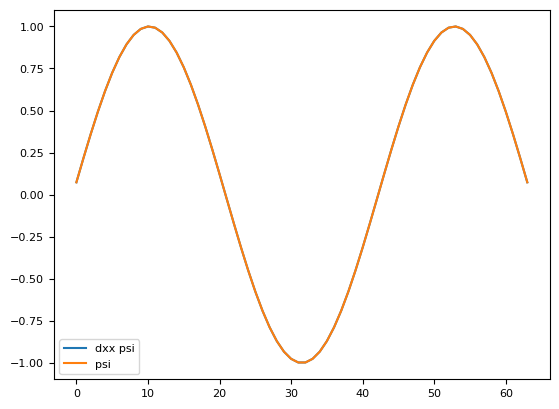

array([4.16611190e-14, 4.18276525e-14, 3.73034936e-14, 3.15858451e-14,
       4.05231404e-14, 2.93098879e-14, 1.24344979e-14, 2.83106871e-14,
       1.09912079e-14, 9.65894031e-15, 1.69864123e-14, 5.44009282e-15,
       8.88178420e-16, 1.36557432e-14, 8.43769499e-15, 2.26485497e-14,
       1.67643677e-14, 4.88498131e-15, 2.64788191e-14, 4.34097203e-14,
       4.04676292e-14, 1.31422651e-14, 1.80411242e-15, 4.18554080e-14,
       4.90718577e-14, 8.88178420e-16, 3.44169138e-15, 4.55191440e-14,
       3.26405569e-14, 6.66133815e-16, 2.06501483e-14, 2.03170814e-14,
       1.44328993e-15, 1.55431223e-15, 3.33066907e-15, 2.96429548e-14,
       6.08402217e-14, 5.56221735e-14, 6.45039577e-14, 9.25370891e-14,
       9.46465128e-14, 7.71327446e-14, 8.41618442e-14, 9.67836922e-14,
       4.09117185e-14, 3.48610030e-14, 6.87228052e-14, 6.85007606e-14,
       4.90718577e-14, 5.35127498e-14, 6.07291994e-14, 3.69704267e-14,
       4.44089210e-15, 1.29896094e-14, 8.21565038e-15, 3.48610030e-14,
      

In [ ]:

N = 64

L = 1
dx = L/(N)
x = np.linspace(0+dx/2, L - dx/2, N)
dx = x[1] -x[0]
# Set up Fourier Space Variables for computing gravitational potential
#kx = 2 * np.pi / ( 2* ( L - 1) + 1)  * np.arange(-N/ 2, N / 2)
#klin = np.fft.ifftshift(kx)
klin = np.pi / L * np.arange(1, N+1)

#klin = np.pi / L * np.arange(1, N+1)
#klin = 1 / ( 2 * (klin - 4) + 1)
#klin = 1 / 1 * np.arange(-N/ 2, N / 2)
q = 3 * np.pi 

psi = np.sin(q * x)
psihat = scipy.fft.dst(psi, type = 2)
plt.plot(psihat)
plt.show()
psihat = psihat * klin**2
hompsi = scipy.fft.idst(psihat, type = 2)
plt.plot(hompsi / q**2, label = "dxx psi")
plt.plot(psi, label = "psi")
plt.legend()
plt.show()
np.abs(psi - hompsi / q**2)

[0.00612607 0.01814279 0.0294623  0.03964958 0.04831315 0.05512008
 0.05980877 0.06219905 0.06219905 0.05980877 0.05512008 0.04831315
 0.03964958 0.0294623  0.01814279 0.00612607]


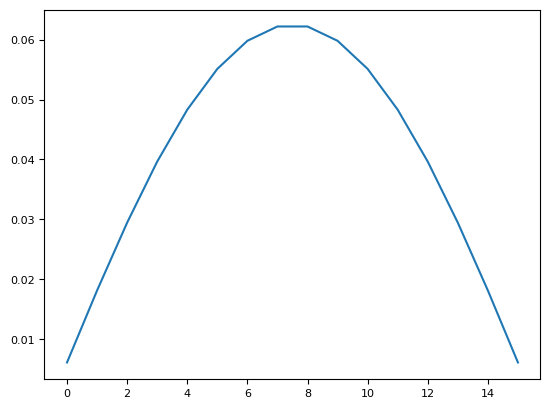

In [ ]:
N = 16

y = np.zeros(N) 
y[0] = 1
hompsi = scipy.fft.idst(y, type = 2 )
plt.plot(hompsi)
print(hompsi)

In [ ]:
x = np.linspace(0+0.125, 1-0.125, 4)
y = np.cos(2 * np.pi * x )
y /= y[0]
y *= hom[0]
y

array([ 0.00612607, -0.00612607, -0.00612607,  0.00612607])